<a href="https://colab.research.google.com/github/acg12/ml_projects/blob/main/KNN/ML_KNN_CLASSIFICATION_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN from scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix
from sklearn.datasets import load_iris

In [2]:
df = load_iris()
df.data.shape

(150, 4)

In [3]:
X = df.data
y = df.target

In [4]:
counts = np.unique(y, return_counts=True)

for i in range(len(np.unique(y))):
    c = np.unique(y, return_counts=True)
    print(f'Class {c[0][i]}: {c[1][i]}')

Class 0: 50
Class 1: 50
Class 2: 50


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [6]:
X_train.shape

(120, 4)

In [7]:
X_test.shape

(30, 4)

In [8]:
def euclidean(p1, p2):
  return np.sqrt(np.sum((p1 - p2)**2))

def knn_predict(X_train, y_train, X_test, k):
  pred = []

  for x in X_test:
    dist = []

    for train in X_train:
      dist.append(euclidean(x, train))

    dist = np.array(dist)
    top_k = np.argsort(dist)[:k]

    labels = y_train[top_k]
    pred.append(mode(labels).mode[0])

  return pred

#1. Tune KNN for optimal K

In [9]:
error = []
for k in range(1, 50):
  y_pred = knn_predict(X_train, y_train, X_test, k)
  error.append(np.sqrt(mean_squared_error(y_test, y_pred))) # RMSE

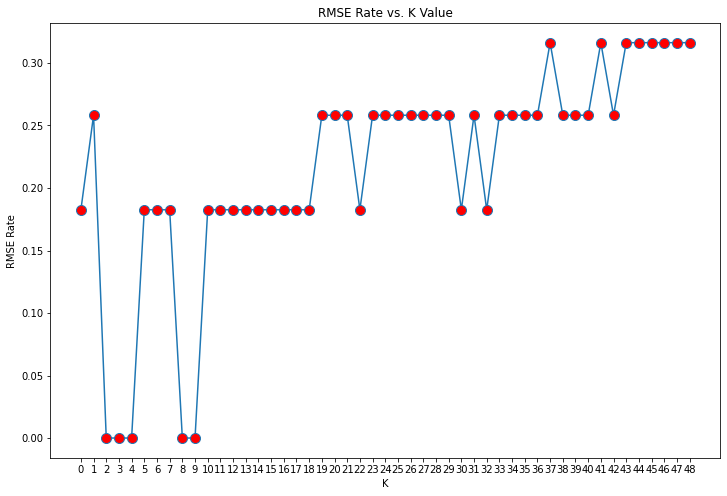

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(error, marker='o', markerfacecolor='red', markersize=10)
plt.title('RMSE Rate vs. K Value')
plt.xticks(np.arange(0, len(error), 1.0))
plt.xlabel('K')
plt.ylabel('RMSE Rate')
plt.show()

Dari graf di atas kita bisa melihat bahwa nilai k optimum adalah **9**.

In [11]:
optimum_k = 9

y_pred = knn_predict(X_train, y_train, X_test, optimum_k)
acc = accuracy_score(y_test, np.array(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Accuracy score: {acc}')
print(f'RMSE: {rmse}')

Accuracy score: 1.0
RMSE: 0.0


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



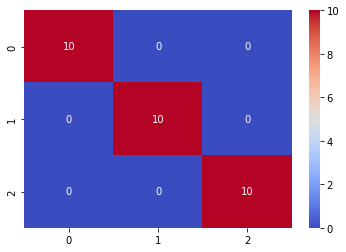

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.show()

#2. Test KNN with different distance measures

## Manhattan Distance

In [14]:
def manhattan(p1, p2):
  return sum(abs(v1 - v2) for v1, v2 in zip(p1, p2))

def knn_manhattan(X_train, y_train, X_test, k):
  pred = []

  for x in X_test:
    dist = []

    for train in X_train:
      dist.append(manhattan(x, train))

    dist = np.array(dist)
    top_k = np.argsort(dist)[:k]

    labels = y_train[top_k]
    pred.append(mode(labels).mode[0])

  return pred

In [15]:
y_pred_man = knn_manhattan(X_train, y_train, X_test, optimum_k)

acc = accuracy_score(y_test, y_pred_man)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_man))
print(f'Accuracy score: {acc}')
print(f'RMSE: {rmse}')

Accuracy score: 0.9333333333333333
RMSE: 0.2581988897471611


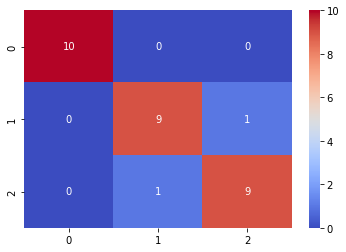

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred_man), annot=True, cmap='coolwarm')
plt.show()

In [17]:
print(classification_report(y_test, y_pred_man))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Hamming Distance

In [18]:
def hamming(p1, p2):
  return sum(v1 != v2 for v1, v2 in zip(p1, p2))

def knn_hamming(X_train, y_train, X_test, k):
  pred = []

  for x in X_test:
    dist = []

    for train in X_train:
      dist.append(hamming(x, train))

    dist = np.array(dist)
    top_k = np.argsort(dist)[:k]

    labels = y_train[top_k]
    pred.append(mode(labels).mode[0])

  return pred

In [19]:
y_pred_hamm = knn_hamming(X_train, y_train, X_test, optimum_k)

acc = accuracy_score(y_test, y_pred_hamm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_hamm))
print(f'Accuracy score: {acc}')
print(f'RMSE: {rmse}')

Accuracy score: 0.8
RMSE: 0.5477225575051661


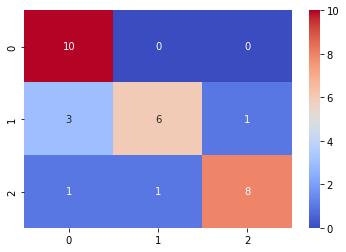

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred_hamm), annot=True, cmap='coolwarm')
plt.show()

In [21]:
print(classification_report(y_test, y_pred_hamm))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.86      0.60      0.71        10
           2       0.89      0.80      0.84        10

    accuracy                           0.80        30
   macro avg       0.82      0.80      0.79        30
weighted avg       0.82      0.80      0.79        30



## Minkowski Distance

In [22]:
def p_root(value, root):
  root_value = 1 / float(root)
  return round(value ** root_value, 3)

def minkowski(p1, p2, p):
  return (p_root(sum(pow(abs(a - b), p) for a, b in zip(p1, p2)), p))

def knn_minkowski(X_train, y_train, X_test, k, p):
  pred = []

  for x in X_test:
    dist = []

    for train in X_train:
      dist.append(minkowski(x, train, p))

    dist = np.array(dist)
    top_k = np.argsort(dist)[:k]

    labels = y_train[top_k]
    pred.append(mode(labels).mode[0])

  return pred

In [23]:
y_pred_min = knn_minkowski(X_train, y_train, X_test, optimum_k, 3)

acc = accuracy_score(y_test, y_pred_min)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_min))
print(f'Accuracy score: {acc}')
print(f'RMSE: {rmse}')

Accuracy score: 1.0
RMSE: 0.0


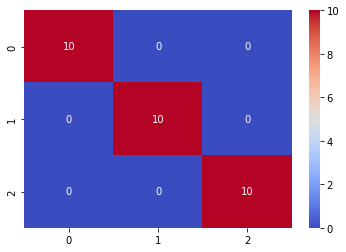

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred_min), annot=True, cmap='coolwarm')
plt.show()

In [25]:
print(classification_report(y_test, y_pred_min))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#3. Regression

Untuk regression, saya akan implementasi menghitung distance menggunakan *euclidean distance*.

In [26]:
def euclidean(p1, p2):
  return np.sqrt(np.sum((p1 - p2)**2))

def knn_regression(X_train, y_train, X_test, k):
  pred = []

  for x in X_test:
    dist = []

    for train in X_train:
      dist.append(euclidean(x, train))

    dist = np.array(dist)
    top_k = np.argsort(dist)[:k]

    y_values = y_train[top_k]
    pred.append(np.mean(y_values))

  return pred

Dataset yang saya pakai adalah dataset yang disediakan oleh library sklearn, yaitu dataset California Housing. Isinya adalah data tentang harga rumah di California. Dataset dapat ditemukan disini: [California Housing Dataset (sklearn)](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

Target saya adalah memprediksi harga rumah di California.

## Import data

In [27]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

In [28]:
X = data.data
y = data.target

In [29]:
X.shape

(20640, 8)

In [30]:
y.shape

(20640,)

In [31]:
pd.concat([pd.DataFrame(X, columns=data.feature_names), pd.Series(y, name='Target')], axis=1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Split dataset

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape

(16512, 8)

## Find optimal *k* value

In [34]:
error = []
for k in range(1, 20):
  y_pred = knn_regression(X_train, y_train, X_test, k)
  error.append(np.sqrt(mean_squared_error(y_test, y_pred))) # RMSE

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(error, marker='o', markerfacecolor='red', markersize=10)
plt.title('RMSE Rate vs. K Value')
plt.xticks(np.arange(0, len(error), 1.0))
plt.xlabel('K')
plt.ylabel('RMSE Rate')
plt.show()